In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape =', x_train.shape, ', x_test.shape =', x_test.shape)
print('t_train.shape =', t_train.shape, ', t_test.shape =', t_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape = (60000, 28, 28) , x_test.shape = (10000, 28, 28)
t_train.shape = (60000,) , t_test.shape = (10000,)


In [10]:
model = Sequential()

model.add(Conv2D(input_shape = (28, 28, 1),
                 kernel_size = 3, filters = 32,
                 strides = (1, 1), activation = 'relu', use_bias = True, padding = 'SAME'))
model.add(MaxPool2D(pool_size = (2, 2), padding = 'SAME'))
model.add(Flatten())

model.add(Dense(10, activation = 'softmax'))

In [11]:
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                62730     
                                                                 
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
hist = model.fit(x_train.reshape(-1, 28, 28, 1), t_train, batch_size = 50, epochs = 30, validation_split = 0.2)

Epoch 1/30
960/960 [==============================] - 3s 3ms/step - loss: 0.2723 - accuracy: 0.9246 - val_loss: 0.1198 - val_accuracy: 0.9688
Epoch 2/30
960/960 [==============================] - 3s 3ms/step - loss: 0.0994 - accuracy: 0.9717 - val_loss: 0.0840 - val_accuracy: 0.9765
Epoch 3/30
960/960 [==============================] - 3s 3ms/step - loss: 0.0711 - accuracy: 0.9794 - val_loss: 0.0749 - val_accuracy: 0.9787
Epoch 4/30
960/960 [==============================] - 3s 3ms/step - loss: 0.0587 - accuracy: 0.9830 - val_loss: 0.0679 - val_accuracy: 0.9791
Epoch 5/30
960/960 [==============================] - 3s 3ms/step - loss: 0.0495 - accuracy: 0.9858 - val_loss: 0.0646 - val_accuracy: 0.9820
Epoch 6/30
960/960 [==============================] - 3s 3ms/step - loss: 0.0424 - accuracy: 0.9875 - val_loss: 0.0666 - val_accuracy: 0.9808
Epoch 7/30
960/960 [==============================] - 3s 3ms/step - loss: 0.0376 - accuracy: 0.9884 - val_loss: 0.0651 - val_accuracy: 0.9816
Epoch 

In [13]:
model.evaluate(x_test.reshape(-1, 28, 28, 1), t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0899 - accuracy: 0.9808


[0.08992402255535126, 0.9807999730110168]

In [31]:
index = np.random.randint(len(x_test))

In [41]:
y_pred = np.argmax(model.predict(x_test[index].reshape(1, 28, 28, 1)))
print(y_pred)

5


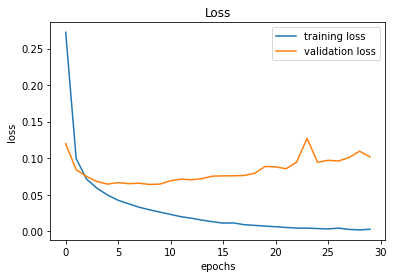

In [14]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label = 'training loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')

plt.show()

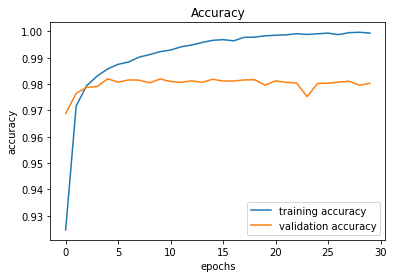

In [15]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.plot(hist.history['accuracy'], label = 'training accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')
plt.legend(loc = 'best')

plt.show()

# One hot encoding

In [21]:
model_2 = Sequential()

model_2.add(Conv2D(input_shape = (28, 28, 1),
                   kernel_size = 3, filters = 32, padding = 'SAME', activation = 'relu', use_bias = True, strides = (1, 1)))
model_2.add(MaxPool2D(pool_size = (2, 2), padding = 'SAME'))
model_2.add(Flatten())

model_2.add(Dense(10, activation = 'softmax'))

In [22]:
model_2.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.01), metrics = ['accuracy'])

model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                62730     
                                                                 
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.utils import to_categorical

t_train = to_categorical(t_train, 10)
t_test = to_categorical(t_test, 10)

print(t_train.shape, t_test.shape)

(60000, 10) (10000, 10)


In [27]:
hist = model_2.fit(x_train.reshape(-1, 28, 28, 1), t_train, batch_size = 50, epochs = 30, validation_split = 0.2, verbose = 1)

Epoch 1/30
960/960 [==============================] - 4s 3ms/step - loss: 0.1437 - accuracy: 0.9566 - val_loss: 0.0917 - val_accuracy: 0.9739
Epoch 2/30
960/960 [==============================] - 3s 3ms/step - loss: 0.0665 - accuracy: 0.9795 - val_loss: 0.0828 - val_accuracy: 0.9778
Epoch 3/30
960/960 [==============================] - 3s 3ms/step - loss: 0.0472 - accuracy: 0.9851 - val_loss: 0.0889 - val_accuracy: 0.9762
Epoch 4/30
960/960 [==============================] - 3s 3ms/step - loss: 0.0383 - accuracy: 0.9877 - val_loss: 0.0883 - val_accuracy: 0.9772
Epoch 5/30
960/960 [==============================] - 3s 3ms/step - loss: 0.0298 - accuracy: 0.9903 - val_loss: 0.0990 - val_accuracy: 0.9771
Epoch 6/30
960/960 [==============================] - 4s 5ms/step - loss: 0.0283 - accuracy: 0.9905 - val_loss: 0.1087 - val_accuracy: 0.9758
Epoch 7/30
960/960 [==============================] - 5s 5ms/step - loss: 0.0238 - accuracy: 0.9918 - val_loss: 0.1069 - val_accuracy: 0.9786
Epoch 

In [28]:
model_2.evaluate(x_test.reshape(-1, 28, 28, 1), t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3089 - accuracy: 0.9783


[0.3089246153831482, 0.9782999753952026]

In [36]:
y_pred = np.argmax(model_2.predict(x_test[index].reshape(-1, 28, 28, 1)))

In [40]:
y_pred == np.argmax(t_test[index])

True

5